# 랜덤포레스트(RandomForest)
랜덤포레스트는 **배깅** 방식이 사용되며 배깅은 같은 알고리즘으로 여러 개의 분류기를 만들어 **보팅(Voting)**으로 최종 결정하는 알고리즘이다. 앙상블 알고리즘 중에서 비교적 빠른 수행 속도를 가지고 있으며 다양한 영역에서 좋은 성능을 보인다. 랜덤 포레스트의 기반 알고리즘은 결정 트리로서 결정 트리의 쉽고 직관적인 장점을 가진다.

랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다. 또한 개별 트리가 학습하는 데이터는 전체 데이터에서 일부가 중첩되게 만든 데이터이다. 이렇게 여러 개의 데이터를 중첩되게 분리하는 것을 **부트스트래핑** 분할 방식이라고 한다.

트리 기반의 앙상블 알고리즘의 단점은 하이퍼 파라미터가 너무 많고 튜닝을 위한 시간이 많이 소모된다는 것이다.

>**파라미터**
- `n_estimators`
- `max_features`
- `max_depth`

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

## 분류(Classification)

In [4]:
df1 = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
df1['target'] = load_breast_cancer().target
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
X1 = df1.iloc[:, :-1]
y1 = np.array(df1['target'])

In [6]:
scaler = StandardScaler()
scaled_X1 = scaler.fit_transform(X1)

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(scaled_X1, y1, test_size=0.2, random_state=94)

In [9]:
rfc = RandomForestClassifier(random_state=94)
rfc.fit(X1_train, y1_train)

RandomForestClassifier(random_state=94)

In [10]:
pred = rfc.predict(X1_test)

In [12]:
acc = accuracy_score(y1_test, pred)
acc

0.9824561403508771

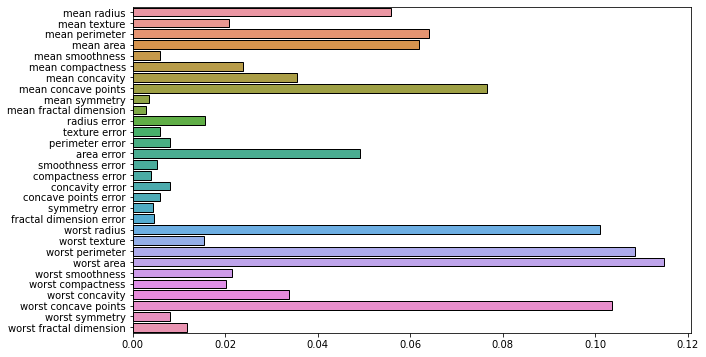

In [13]:
plt.figure(figsize = (10, 6))
sns.barplot(y=X1.columns.tolist(), x=rfc.feature_importances_, edgecolor=(0, 0, 0))
plt.show()

## 회귀(Regression)

In [18]:
df2 = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
df2['target'] = load_boston().target
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
X2 = df2.iloc[:, :-1]
y2 = np.array(df2['target'])

In [20]:
scaler = StandardScaler()
scaled_X2 = scaler.fit_transform(X2)

In [21]:
X2_train, X2_test, y2_train, y2_test = train_test_split(scaled_X2, y2, test_size=0.2, random_state=94)

In [22]:
rfr = RandomForestRegressor(random_state=94)
rfr.fit(X2_train, y2_train)

RandomForestRegressor(random_state=94)

In [23]:
pred = rfr.predict(X2_test)

In [25]:
mse = mean_squared_error(y2_test, pred)
mse

7.346417578431373